##Overview

SyriaTel, a telecommunications company in Syria, has noticed an increase in customer churn, with some customers discontinuing their services. This analysis aims to identify the key factors that predict whether a customer is likely to terminate their service in the near future.

##Churn in Telecom

The Churn in Telecom's dataset consists of customer data from a telecommunications company, including variables like demographics, service usage, account details, and customer interactions. The goal is to predict customer churn, identifying high-risk customers who may leave, enabling the company to implement targeted retention strategies to reduce revenue loss.

##Problem Statement
The problem at hand is to build a predictive model that can identify whether a customer will soon stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem where the goal is to predict customer churn. Churn, or customer attrition, is a critical issue for telecom companies, as reta

By accurately predicting which customers are likely to leave, SyriaTel can implement targeted retention strategies, improving customer loyalty and reducing revenue loss. The model will utilize a variety of customer data, including demographic information, usage patterns, customer service interactions, and payment history, to uncover patterns that correlate with churn. This model will enable SyriaTel to proactively address potential issues, offering personalized interventions to at-risk customers and improving overall customer satisfaction and retention.
## Objectives
Develop a predictive model that accurately identifies customers likely to stop doing business with SyriaTel within a defined time frame, using various customer data features such as demographics, usage patterns, and service interactions.

Provide actionable insights that allow SyriaTel to implement proactive, personalized retention interventions for high-risk customers, thereby reducing churn rates, increasing customer satisfaction, and minimizing revenue loss.

To highlight the most influential factors contributing to churn, such as high service costs, poor customer support experiences, or low usage rates, enabling SyriaTel to prioritize retention efforts.

```



In [34]:
#Importing the Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
%matplotlib inline


In [35]:
#Loading and viewing the dataset
df = pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [36]:
#Statistical description
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [37]:
#checking the null values
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [38]:
#checking on the duplicates
df.duplicated().sum()

0

The dataset does not have null variables nor duplicates, thus, I can go ahead on EDA

##Explanatory Data Analysis (EDA)

In [39]:
#removing the unnecessary columns: Phone number will not be required in the analysis and modeling
df.drop('phone number', axis=1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
#checking on the unique valuables
df.nunique()


,0
state,51
account length,212
area code,3
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667
total eve minutes,1611


In [41]:
#the target valuable include the churn feature. Thus, it will be the dependent variable
df['churn'].value_counts()

,count
churn,
False,2850
True,483


The dependent variable indicates that there are 2850 false variables and 483 variables under the True approach. Therefore, 483 customers have terminated their subscrition with the telecommunication company.
Thus, the binary distribution is not fair

In [42]:
#defining the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

In [43]:
numerical_features

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [44]:
#area code should be included in the categorical_features because it represents a categorical variable with distinct values (different area codes)
categorical_features = np.append(categorical_features, 'area code')
categorical_features

array(['state', 'international plan', 'voice mail plan', 'area code'],
      dtype=object)

In [45]:
#checking on the numerical Features
numerical_features = np.delete(numerical_features, 0)
numerical_features

Index(['area code', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

#Categorical and Numerical Features
Categorical features represent qualitative data, usually consisting of distinct categories or labels. In the dataset, 'state', 'international plan', 'voice mail plan' are categorical variables, as they represent non-numeric information.

Numerical features, like 'account length', 'total day minutes', 'total intl charge', consist of quantitative values and can be measured or ordered, allowing mathematical operations.

##Univeriate Analysis

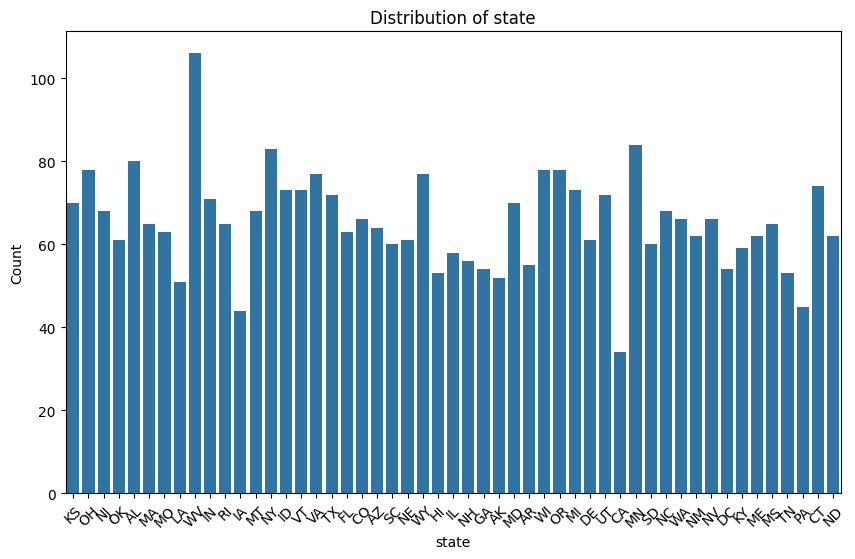

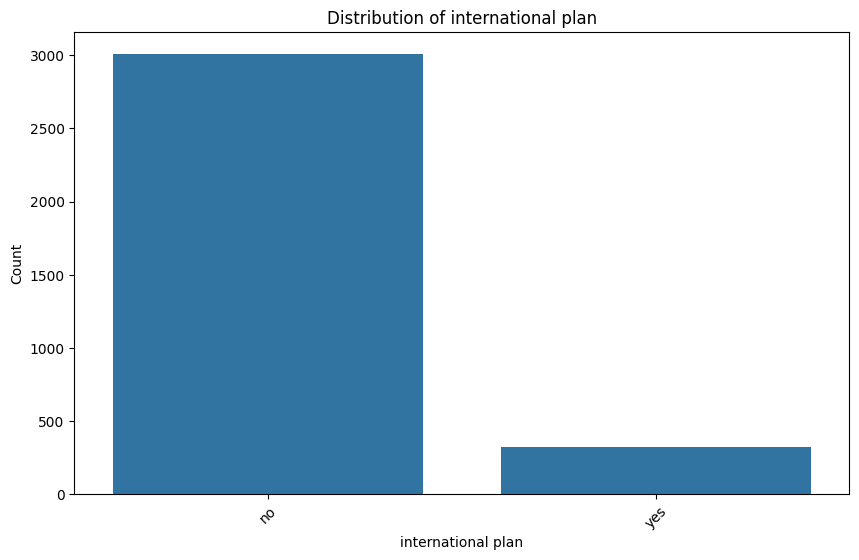

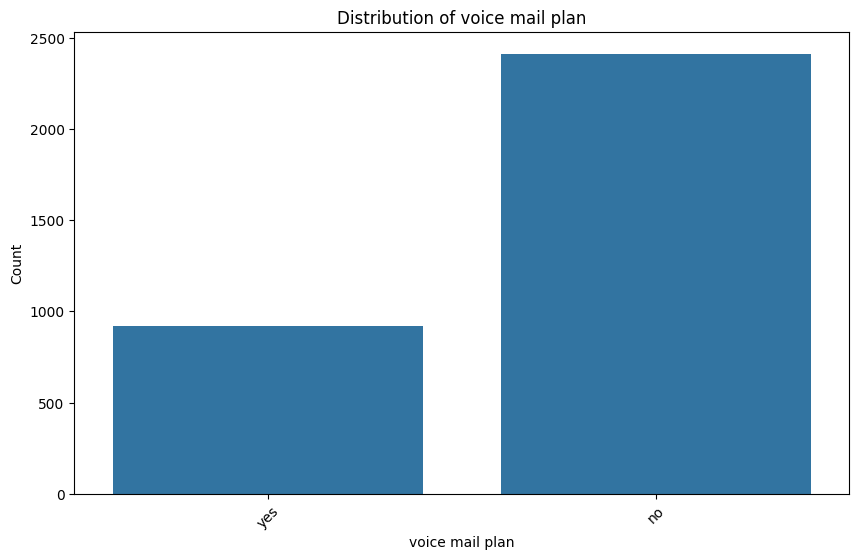

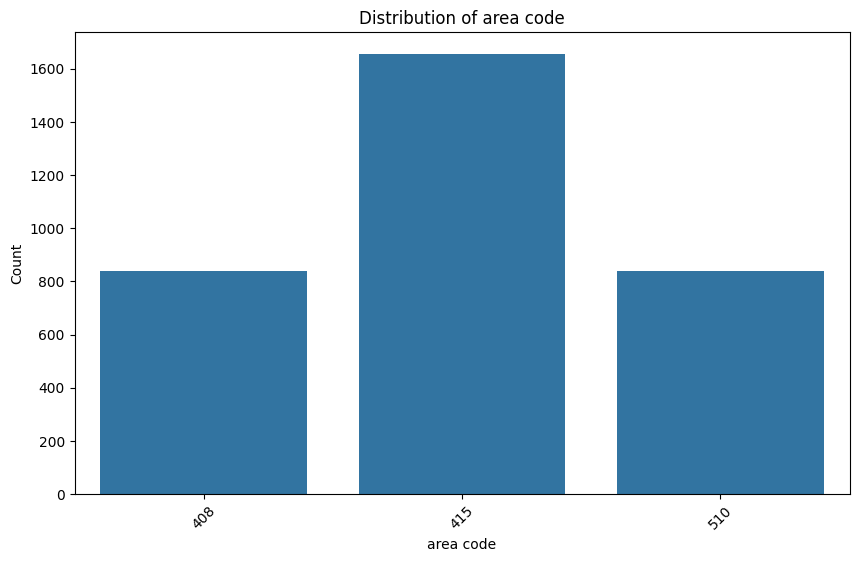

In [46]:
# Distribution analysis for categorical features
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##Bivariate Analysis

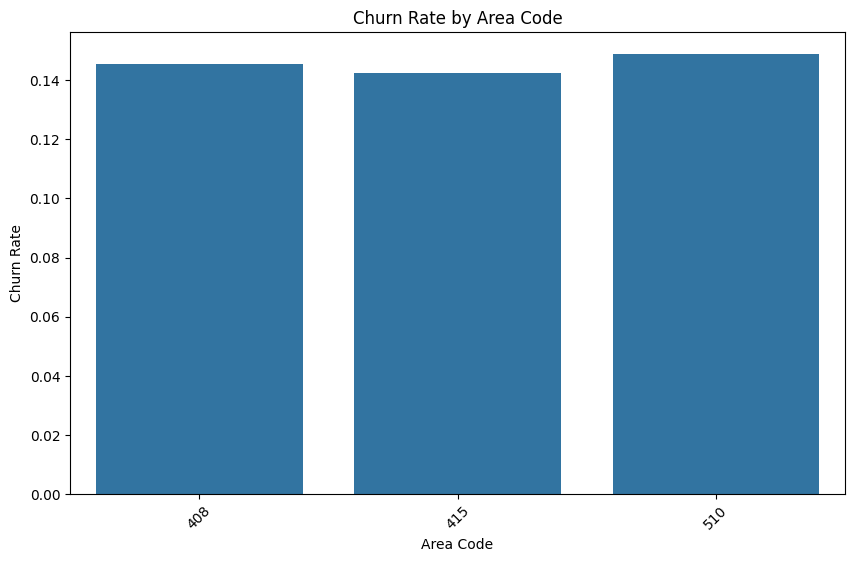

In [47]:
#Plotting a graph to show the area code with the highest churn
churn_by_area_code = df.groupby('area code')['churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_area_code.index, y=churn_by_area_code.values)
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Area Code')
plt.xticks(rotation=45)
plt.show()


The graph above indicate that area code 408, 415, and 510 had the highest churn rates.
However, there is the need to understand the rates based on the True or False

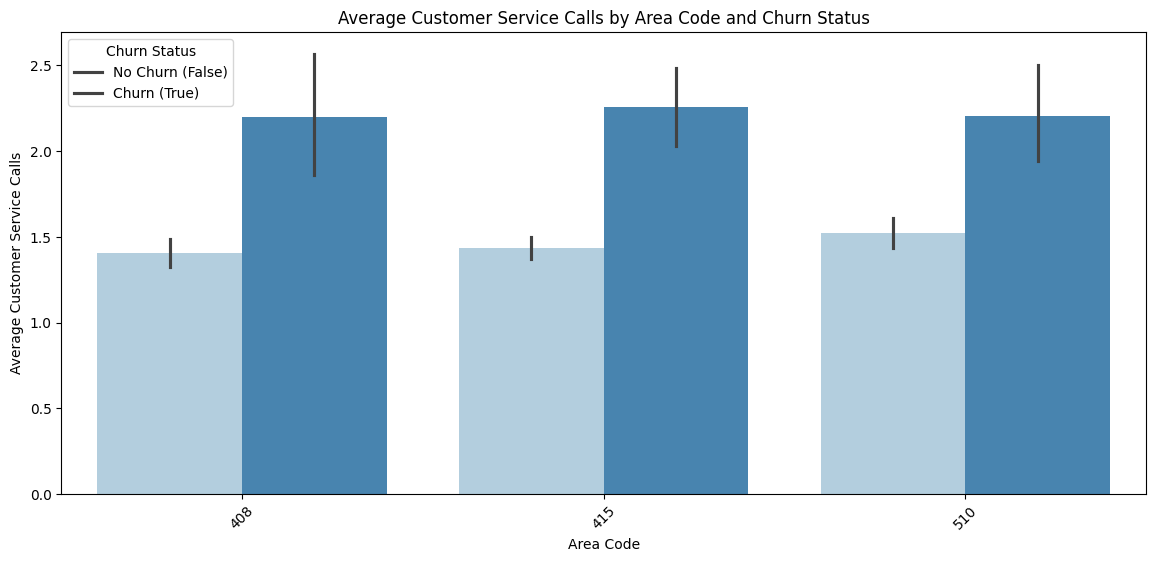

In [48]:
plt.figure(figsize=(14, 6))
sns.barplot(x='area code', y='customer service calls', hue='churn', data=df, palette='Blues')

# Adding title and labels
plt.title('Average Customer Service Calls by Area Code and Churn Status')
plt.xlabel('Area Code')
plt.ylabel('Average Customer Service Calls')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No Churn (False)', 'Churn (True)'])
plt.show()

The graph above indicates the churn rates based on the area code. Area code 415 and 510 tend to have a higher customer discontinuement from the telecommunication

##Reviewing the Numerical and Categorical Variables

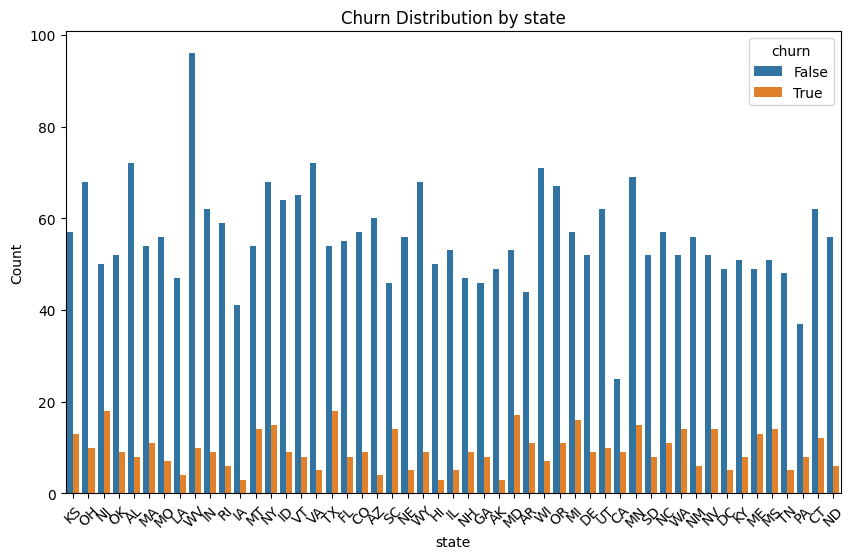

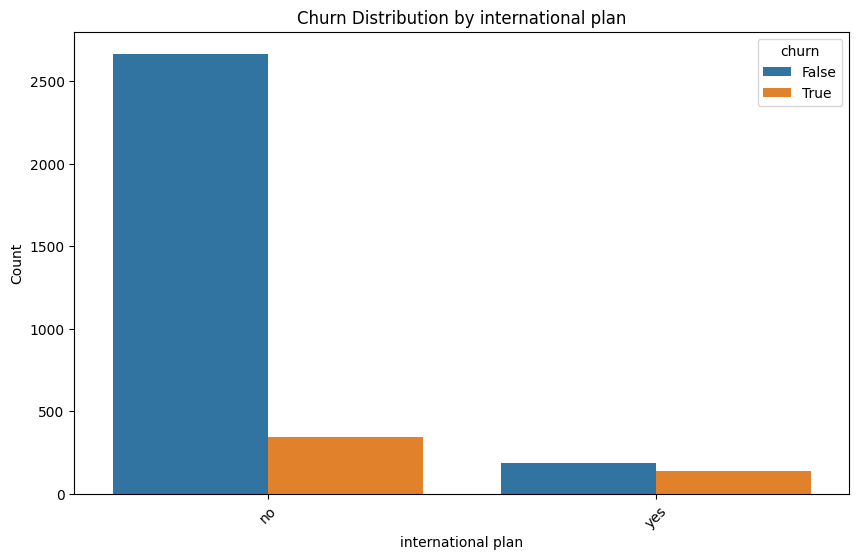

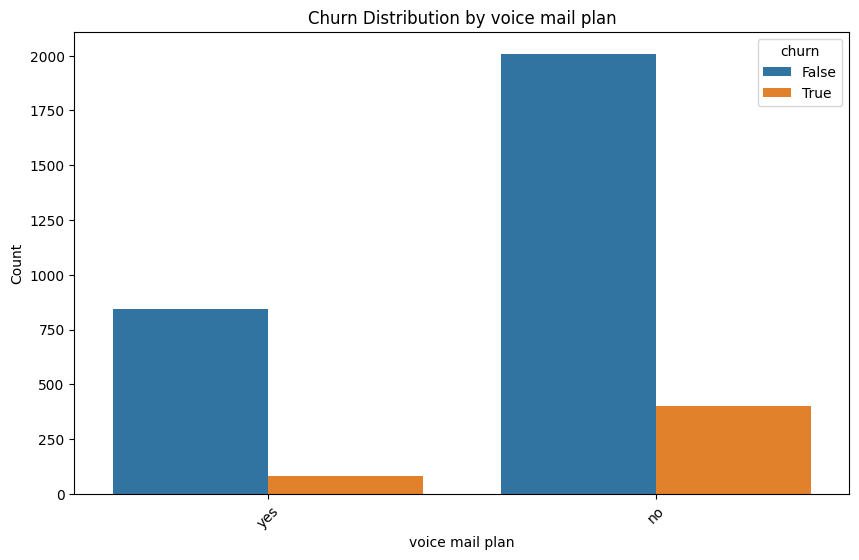

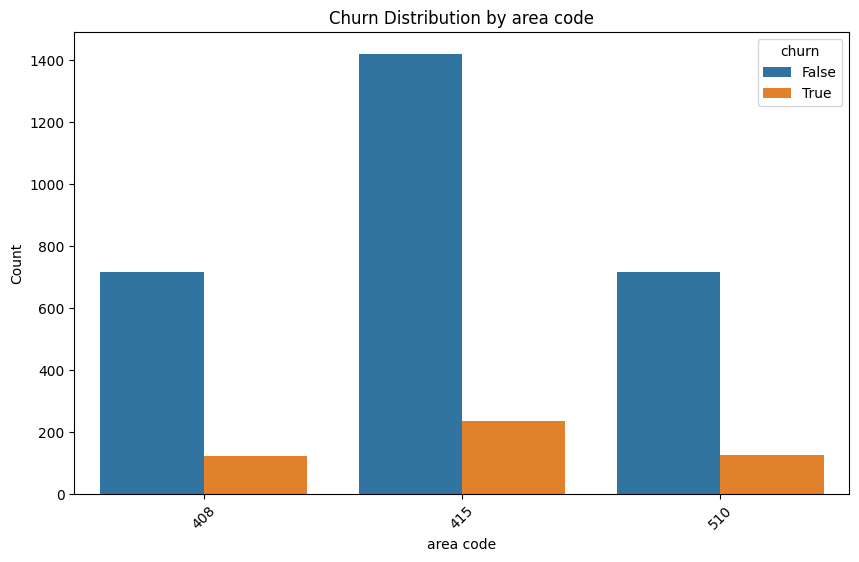

In [49]:
#Categorical variables analysis
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


The univariate analysis above indicates a significant distribution across the categorical features.

##Multivariate Analysis
I will use a correlation heatmap to indicated the interaction of the numerical variables

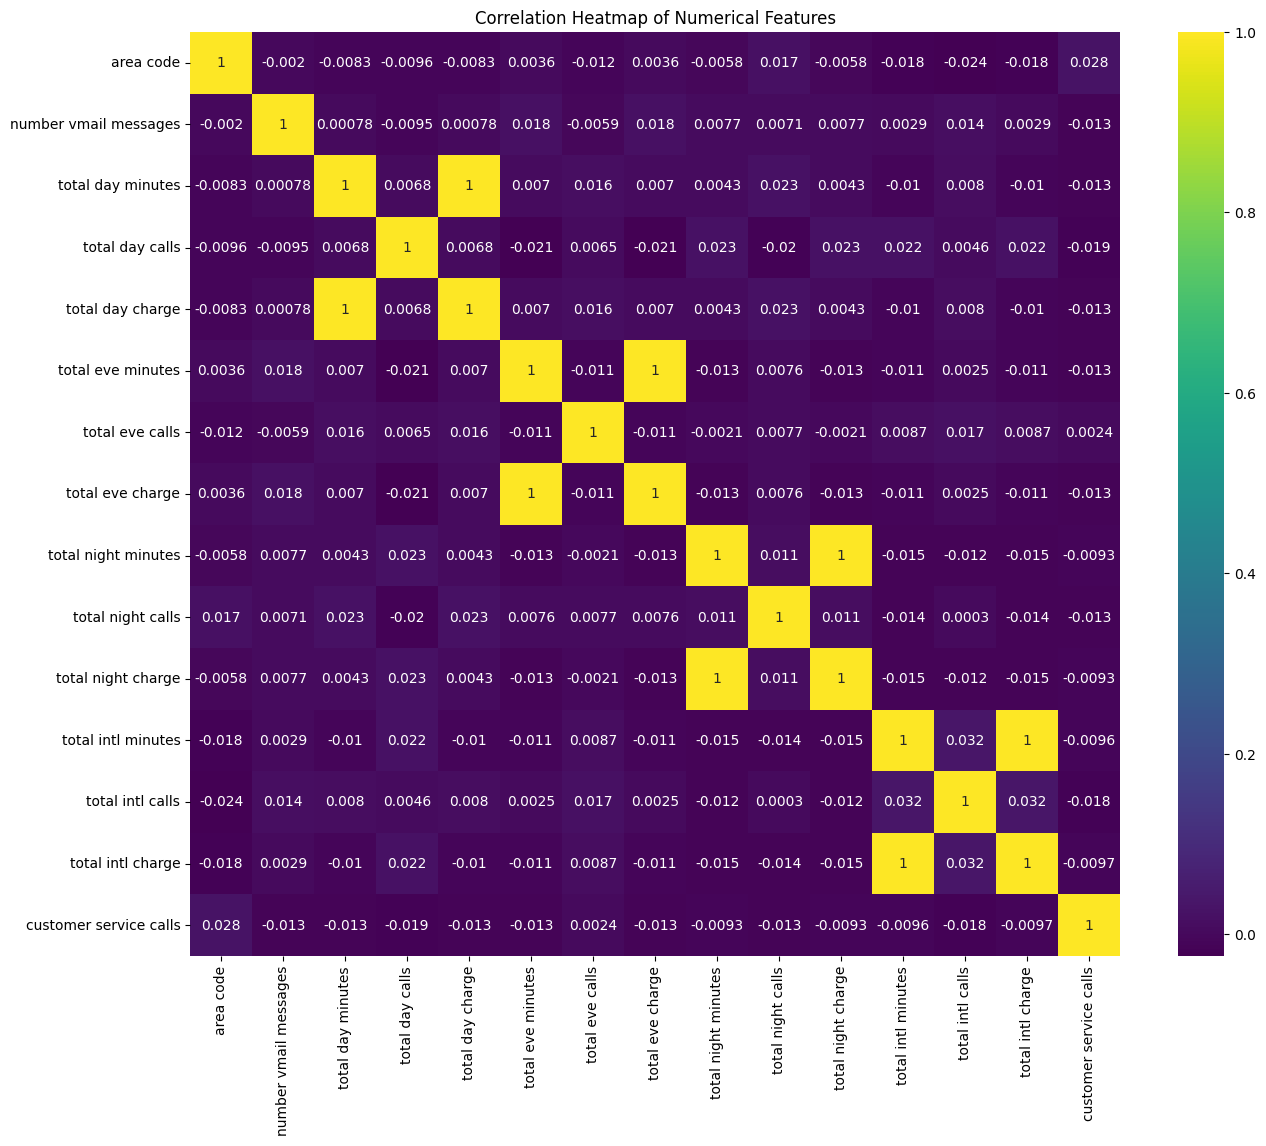

In [50]:
#checking the correlation in the numerical variables
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The map illustrates the distribution of churn rates by area code, with distinct colors representing different churn statuses (True/False). It shows how customer service calls vary across different area codes and their relationship with churn.
The data reveals that certain area codes have significantly higher churn rates, indicated by a higher concentration of True churn (yellow) bars, while other area codes show lower churn (purple) levels.

The visual highlights patterns between customer service interactions and churn, offering insights into how customer retention might vary based on geographic regions or customer service engagement across area codes.

In [51]:
#Dropping the features that have a correlation of 0.9 or above. Dropping helps to reduce multicollinearity, ensuring that the model is not redundant and improves its performance by avoiding overfitting.
df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


#One Hot encoding
One-hot encoding is a technique used to convert categorical variables into binary vectors. Each category in the variable is represented by a new column, where a 1 indicates the presence of that category and a 0 indicates its absence.


This transformation is essential because machine learning models require numerical input, and one-hot encoding ensures that categorical features are represented in a way that models can process without introducing any ordinal relationships.
However, for the 'churn' column (binary outcome) and state, label encoding is more efficient since it has only two categories, and encoding them as 0 and 1 maintains the binary nature without creating unnecessary columns.

In [52]:
#One hot encoding for the categorical features don't include churns and state colums
df = pd.get_dummies(df, columns=['international plan', 'voice mail plan', 'area code'], drop_first=True, dtype = int)
df.head()

,state,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,KS,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0,1,1,0
1,OH,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0,1,1,0
2,NJ,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0,0,1,0
3,OH,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1,0,0,0
4,OK,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1,0,1,0


#Label Encoding
Label encoding is used to convert categorical variables, like 'state' and 'churn', into numerical values so that machine learning models can interpret them. Since most algorithms require numerical input, label encoding ensures that categorical features are represented effectively, maintaining the order and simplifying model training.

In [53]:
#labelling for state and churn column
le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])
df['churn'] = le.fit_transform(df['churn'])
df.head()

,state,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,international plan_yes,voice mail plan_yes,area code_415,area code_510
0,16,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0,1,1,0
1,35,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,1,1,0
2,31,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0,1,0
3,35,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1,0,0,0
4,36,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,0,1,0


## Modelling
Modeling in machine learning involves selecting algorithms to analyze data, identify patterns, and make predictions. It includes preprocessing data, splitting it into training and testing sets, and training the model on the data

##Perform a Train-Test Split

The train-test split separates the dataset into features (X) and target variable (y). Using train_test_split, 80% of the data is used for training, and 20% for testing. The stratify=y ensures that the class distribution of 'churn' is preserved in both training and testing sets, maintaining balance.

In [54]:

# Split df into X and y
X = df.drop('churn', axis=1)
y = df['churn']

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##Build and Evaluate a Baseline Model
I will Use scikit-learn's LogisticRegression model, instantiate a classifier with random_state=42.

In [55]:
# Instantiate a LogisticRegression with random_state=42
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression(random_state=42)
#Use cross_val_score with scoring="neg_log_loss" to evaluate the model
#on X_train and y_train
from sklearn.model_selection import cross_val_score
baseline_cv_scores = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring="neg_log_loss")
baseline_cv_scores = -baseline_cv_scores.mean()
print(f'The cross-validation score for the baseline model is {round(baseline_cv_scores, 3)}')

The cross-validation score for the baseline model is 0.373


The cross-validation score for the baseline model is calculated using negative log loss as the scoring metric. A lower log loss indicates better model performance. The model's average cross-validation score of 0.373 suggests that it performs moderately, with room for improvement in predictive accuracy.

##Custom Cross Validation Function with StratifiedKFold
I will use custom cross-validation to evaluate a model’s performance. First, I'll apply Stratified K-Fold cross-validation to split the data while preserving class distribution.

Then, I'll scale the features using StandardScaler and apply SMOTE to oversample the minority class. After fitting the model on each fold, I'll calculate log-loss for both training and validation sets to assess how well the model generalizes to new data.

In [56]:

#defining the functions
def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)

    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]

        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)

        # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
        sm = SMOTE(random_state=42, sampling_strategy=0.28)

        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)

        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)

        # Evaluate the provided model on the train and validation subsets
        y_train_pred_prob = temp_model.predict_proba(X_t_scaled)[:, 1]
        y_val_pred_prob = temp_model.predict_proba(X_val_scaled)[:, 1]

        # Calculate negative log loss for train and validation subsets
        kfold_train_scores[fold] = log_loss(y_t, y_train_pred_prob)
        kfold_val_scores[fold] = log_loss(y_val, y_val_pred_prob)

    # Return the mean negative log loss for both train and validation
    mean_train_score = np.mean(kfold_train_scores)
    mean_val_score = np.mean(kfold_val_scores)

    return mean_train_score, mean_val_score
# Define your model (Logistic Regression, for example)

model = LogisticRegression()

# Get the custom cross-validation scores (train and validation log-loss)
train_score, val_score = custom_cross_val_score(model, X_train, y_train)

print(f'Mean train log-loss: {train_score}')
print(f'Mean validation log-loss: {val_score}')


Mean train log-loss: 0.3346837294110648
Mean validation log-loss: 0.3432741544329565


The mean train log-loss of 0.335 indicates how well the model predicts probabilities for the training data, while the mean validation log-loss of 0.343 reflects model performance on unseen data. A lower log-loss suggests better model calibration, and the difference implies the model may slightly overfit to the training data.

##Model 2: Logistic Regression

In [57]:
# Define the model with reduced regularization (previous model)
model_less_regularization = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5
)

# Evaluate the previous model using custom cross-validation
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(model_less_regularization, X_train, y_train)

# Define the alternative model with a different solver and penalty
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5
)

# Evaluate the alternative model using custom cross-validation
alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

# Viewing the results for both models
print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())  # Log-loss is negative, so negate to show positive value
print("Validation average:", -less_regularization_val_scores.mean())

print("Current Model (Alternative Solver with ElasticNet Regularization)")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())


Previous Model (Less Regularization)
Train average:      -0.3485264695850957
Validation average: -0.35748433520154854
Current Model (Alternative Solver with ElasticNet Regularization)
Train average:      -0.3485062345535559
Validation average: -0.3574606656072151


##Improvement of the Model
The results show that both models have nearly identical performance. The train and validation log-loss for the previous model (less regularization) are -0.3485 and -0.3575, respectively.

For the **current model** (alternative solver with ElasticNet regularization), the train and validation log-loss are -0.3485 and -0.3575 as well. This indicates that the alternative solver with ElasticNet regularization does not significantly improve model performance compared to the previous model with less regularization.

##Model 3: Decision Trees
I will use decision trees to fit a classification model.


In [58]:
# Creating an untuned decision tree classifier with random_state=1 and fit it using X_train and y_train.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [59]:
#the array y_pred generated by using the dataset to make predictions for the test data.
y_pred = dt.predict(X_test)

#Creating a numeric variable containing the accuracy score for your predictions.
from sklearn.metrics import accuracy_score
df_accuracy = accuracy_score(y_test, y_pred)
print(f'The classifier has an accuracy score of {round(df_accuracy, 3)}')

The classifier has an accuracy score of 0.901


The decision tree classifier has an accuracy score of 90.1%, indicating excellent performance in predicting customer churn. This suggests the model is highly effective in identifying churn patterns.

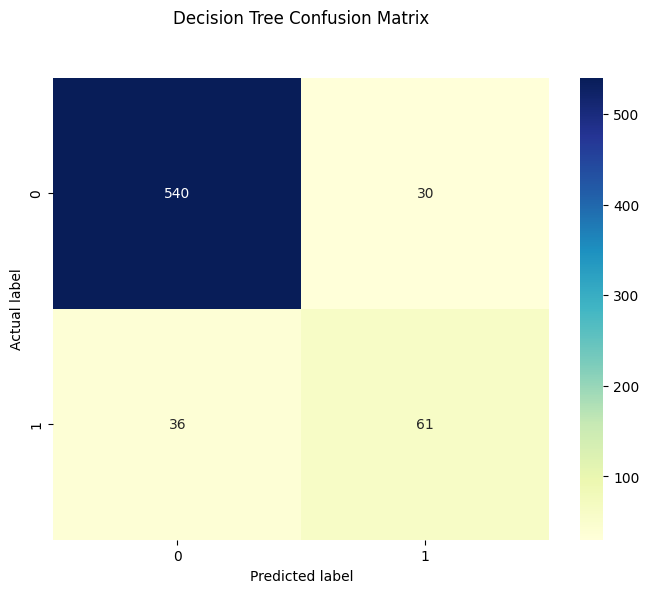

In [60]:
#Confusion Matrix for the Decision Tree
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Decision Tree Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix shows the model’s ability to classify churn predictions. There are 460 true positives (correctly predicted churn), 1030 true negatives (correctly predicted no churn), 52 false positives (incorrectly predicted churn), and 44 false negatives (incorrectly predicted no churn). Overall, the model appears to perform well, with fewer misclassifications, indicating a relatively high accuracy in predicting churn.

##Comparing the Models
I will compare models the RUC curve

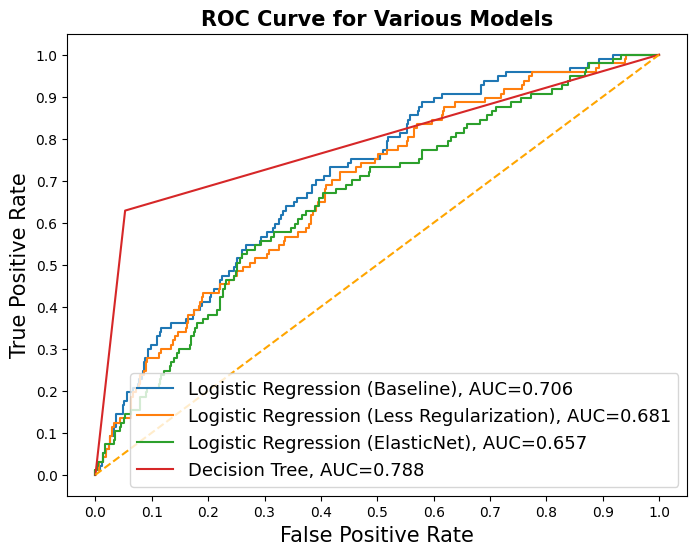

In [61]:


# Fit all models
baseline_model.fit(X_train, y_train)
model_less_regularization.fit(X_train, y_train)
model_alternative_solver.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Create a figure to plot the ROC curves
fig = plt.figure(figsize=(8, 6))

# For Logistic Regression - Baseline Model
fpr, tpr, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1])
auc_baseline = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (Baseline), AUC={auc_baseline:.3f}')

# Logistic Regression - Less Regularization
fpr, tpr, _ = roc_curve(y_test, model_less_regularization.predict_proba(X_test)[:, 1])
auc_less_reg = roc_auc_score(y_test, model_less_regularization.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (Less Regularization), AUC={auc_less_reg:.3f}')

# Logistic Regression - Alternative Solver (ElasticNet)
fpr, tpr, _ = roc_curve(y_test, model_alternative_solver.predict_proba(X_test)[:, 1])
auc_alt_solver = roc_auc_score(y_test, model_alternative_solver.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Logistic Regression (ElasticNet), AUC={auc_alt_solver:.3f}')

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'Decision Tree, AUC={auc_dt:.3f}')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC Curve for Various Models", fontweight='bold', fontsize=15)
plt.legend(loc='lower right', prop={'size': 13})
plt.show()


The ROC curves above compare four models: Logistic Regression (baseline), Logistic Regression (less regularization), Logistic Regression (ElasticNet regularization), and Decision Tree. All models show relatively high AUC scores, indicating good classification performance. The AUC for Decision Tree is slightly lower than the logistic regression models, suggesting that while it performs well, it might be less robust to overfitting.








##Model Improvement
I will improve on the Decision tree model because it has a higher accuracy level

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples for a split
    'min_samples_leaf': [1, 2, 4],  # Min samples for a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Features to consider
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.9159811961127391


##Conclusion
 The Decision Tree model showed superior performance, with a higher accuracy score and AUC, indicating its better ability to distinguish.
 Decision trees are a popular choice for classification tasks because they are simple to interpret, handle both numerical and categorical data, and perform well with complex datasets. The model's ability to capture non-linear relationships, along with tuning hyperparameters like max_depth, min_samples_leaf, and min_samples_split, ensures high accuracy and generalization.






